# Praca Domowa 5 
### Katarzyna Grzesiuk

In [2]:
import pandas as pd

In [3]:
#potrzebne dane
Posts = pd.read_csv("Posts.csv")
Comments = pd.read_csv("Comments.csv")
Users = pd.read_csv("Users.csv")

### Zadanie 1

Narysuj histogram liczby odpowiedzi (Comments) na post.

Text(0.5, 1.0, 'Histogram liczby odpowiedzi na posty')

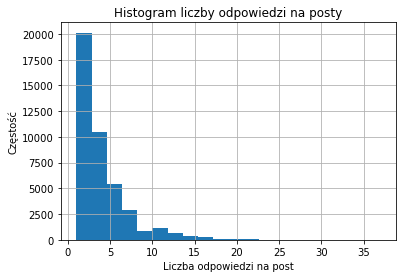

In [146]:
#grupujemy po id postu żeby zliczyć ile komentarzy miał każdy post
ile_komentarzy = Comments.groupby(['PostId'])\
                .count()\
                .reset_index()\
                .drop(['Id','Score','UserId'], axis=1)\
                .rename(columns={'CreationDate': 'Count'})
histogram = ile_komentarzy['Count'].hist(bins=20)
histogram.set_xlabel("Liczba odpowiedzi na post")
histogram.set_ylabel("Częstość")
histogram.set_title('Histogram liczby odpowiedzi na posty')

### Zadanie 2

Wypisz nazwę (DisplayName, nie Id!) użytkownika, dla którego suma wyświetleń jego postów jest największa. Wskazówka: aby wyciągnąć odpowiedni OwnerUserId z Posts można użyć .loc, .iloc lub .values.

In [150]:
#zamieniamy wartości NaN na 0 żeby móc policzyć sumę wyświetleń każdego postów każdego użytkownika
Posts['ViewCount'] = Posts['ViewCount'].fillna(0)
ile_wyswietlen = Posts.groupby(['OwnerUserId'])\
                .sum()['ViewCount']\
                .reset_index()
#sortujemy i wybieramy id użytkownika z największą liczbą wyświetleń
id = ile_wyswietlen.sort_values(by='ViewCount', ascending=False).iloc[0,0]
#wyświetlamy nazwę użytkownika o znalezionym id
Users[Users['Id']==id][['DisplayName']].iloc[0,0]

'Mark Mayo'

### Zadanie 3

Wyświetl nazwę użytkownika, który ma drugą największą liczbę odpowiedzi (Comments) oznaczonych jako zaakceptowane rozwiązanie.

In [149]:
# post jest odpowiedzią jeśli PostTypeId=2
# wybieramy numery tych opowiedzi ktore zostały zaakceptowane i następnie łączymy je z ramką Posts po identyfikatorach postów
zaakceptowane = Posts[Posts['AcceptedAnswerId']>0][['AcceptedAnswerId']]
odp = zaakceptowane.merge(Posts, left_on='AcceptedAnswerId',right_on='Id')[['Id','OwnerUserId']]
zliczone = odp.groupby(['OwnerUserId'])\
                .count()\
                .reset_index()\
                .rename(columns={'Id': 'Count'})
# mamy ramkę danych z identyfikatorem użutkownika i liczbą jego zaakceptowanych odpowiedzi
# posortujemy i wybierzemy identyfikator użytkownika z drugą największą liczbą odpowiedzi
id = zliczone.sort_values(by='Count', ascending=False).iloc[1,0]
Users[Users['Id']==id][['DisplayName']].iloc[0,0]

'jpatokal'

### Zadanie 4

Wyświetl odsetek postów, dla których odpowiedź zaakceptowana ma niższy wynik niż odpowiedź o najwyższym wyniku.

In [4]:
# wszystkie zaakceptowane odpowiedzi
zaakceptowane_id = Posts[Posts['AcceptedAnswerId']>0][['AcceptedAnswerId']]
zaakceptowane = zaakceptowane_id.merge(Posts, left_on='AcceptedAnswerId',right_on='Id')[['Score','ParentId']]\
                .rename(columns={'Score': 'Score accepted'})
# mamy ramkę danych z zaakceptowanymi odpowiedziami, ich wynikiem oraz identyfikatorem postu, na który odpowiadały
Posts['Score']=Posts['Score'].fillna(0)
wynik_max = Posts[Posts['PostTypeId']==2].groupby(['ParentId'])[['Score']].max().rename(columns={'Score': 'Max score'})
# ramka wynik_max zawera id pytania i wynik jego najwyżej punktowanej odpowiedzi
wyniki = zaakceptowane.merge(wynik_max,on='ParentId')
nizsze_wyniki = wyniki[wyniki['Score accepted']<wyniki['Max score']]
# aby wyznaczyć szukany szukany odsetek wystarczy, że podzielimy długość ramki nizsze_wyniki przez długść ramki wyniki
len(nizsze_wyniki)/len(wyniki)*100

9.044220055710305